# Police Killings in the US - Exploratory Data Analysis

- The ultimate goal for this project is to use demographics and shooting data to predict the race of victims of fatal police shootings in the US.
- This notebook will focus on the following task:
	-  Exploratory data analysis
- The following notebook, "Classification_Model", will focus on building the actual model to make predictions.

# Load in Dataframe from "SQL_Data_Cleaning" Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import datetime as dt

In [2]:
with open('Data/sql_demo_killings_df.pkl','rb') as read_file:
    demo_killings_df = pickle.load(read_file)

# EDA

The classifier model will be built to determine if a victim is white or a POC. Therefore, the overall race distribution will be compared to the race distribution for each feature. The following question needs to be asked:
- **Are there any trends that make race more predictable for each shooting?**
- i.e. what makes police more likely to kill POC?

**Other questions to ask**
- What are the demographics of the cities with the most police killings?
    - How does this compare with the rest of the cities?
- What is the correlation between poverty_rate and median_income?
- What is the correlation between poverty_rate and percent_completed_hs?

---

The results below will inform how the classifier model is built in the next notebook.

---

## Overall Race Distribution and Correlations

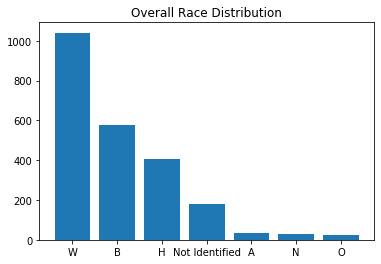

In [3]:
plt.bar(demo_killings_df.race.value_counts().index, demo_killings_df.race.value_counts().values)
plt.title('Overall Race Distribution')
plt.show()

In [4]:
def correlations(df):

    return df[['year', 'age','poverty_rate', 'percent_completed_hs', 'share_white', 'share_black',
               'share_native_american', 'share_asian', 'share_hispanic', 'median_income']].corr().style.background_gradient()

In [5]:
correlations(demo_killings_df)

,year,age,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,median_income
year,1,0.00414851,-0.0014991,0.0354544,-0.0172413,0.00138249,0.067457,0.000152659,-0.0553976,0.0133512
age,0.00414851,1,-0.0383083,0.0452342,0.174043,-0.0957276,-0.00987913,-0.0765002,-0.112443,-0.00626464
poverty_rate,-0.0014991,-0.0383083,1,-0.509592,-0.344144,0.372695,0.128167,-0.217802,0.136173,-0.747085
percent_completed_hs,0.0354544,0.0452342,-0.509592,1,0.32349,-0.093915,-0.0358728,0.0406246,-0.6213,0.403839
share_white,-0.0172413,0.174043,-0.344144,0.32349,1,-0.722141,-0.130753,-0.368734,-0.22347,0.0670932
share_black,0.00138249,-0.0957276,0.372695,-0.093915,-0.722141,1,-0.124544,-0.12083,-0.218138,-0.271761
share_native_american,0.067457,-0.00987913,0.128167,-0.0358728,-0.130753,-0.124544,1,-0.0661786,-0.0351895,-0.0751096
share_asian,0.000152659,-0.0765002,-0.217802,0.0406246,-0.368734,-0.12083,-0.0661786,1,0.142461,0.483911
share_hispanic,-0.0553976,-0.112443,0.136173,-0.6213,-0.22347,-0.218138,-0.0351895,0.142461,1,0.00482967
median_income,0.0133512,-0.00626464,-0.747085,0.403839,0.0670932,-0.271761,-0.0751096,0.483911,0.00482967,1


## Race Distributions

In [6]:
def race_distribution(df, column):
    
    for item in df[column].value_counts().index:
        plt.bar(df[df[column] == item].race.value_counts().index, df[df[column] == item].race.value_counts().values)
        plt.title('Race Distribution - ' + str(item))
        plt.show()

### Region

- Victims on the West and East Coasts are disproportionately POC.
    - However, this is likely due to demographics

In [7]:
demo_killings_df.region.value_counts()

South         867
West Coast    493
Mountain      335
Midwest       325
Northeast     188
Central        64
Other          20
Name: region, dtype: int64

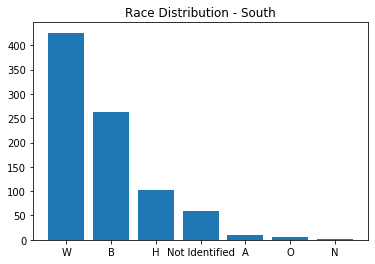

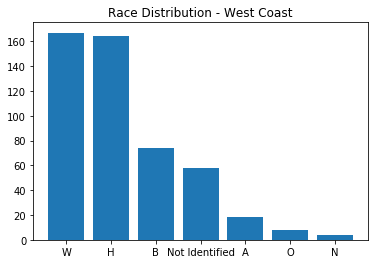

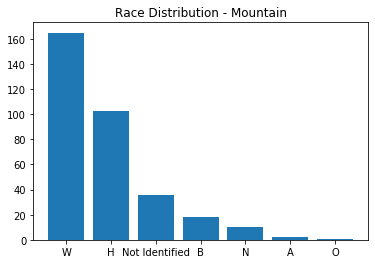

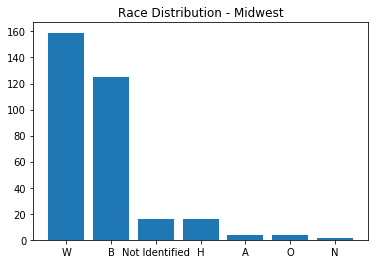

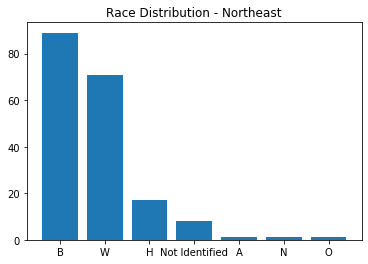

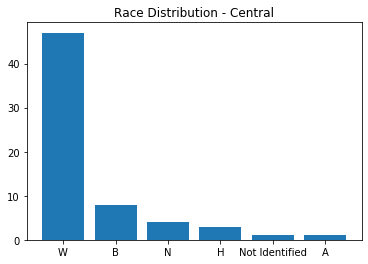

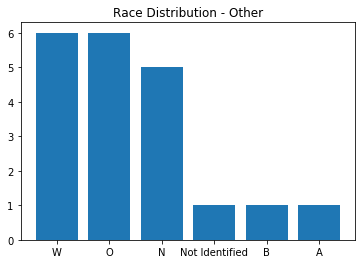

In [8]:
race_distribution(demo_killings_df, 'region')

### City Type

- Victims in any type that is not a city are disproportionately white

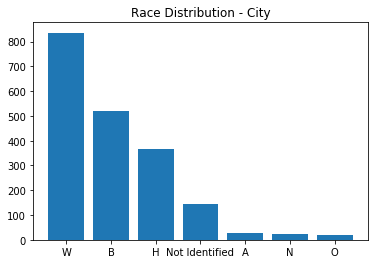

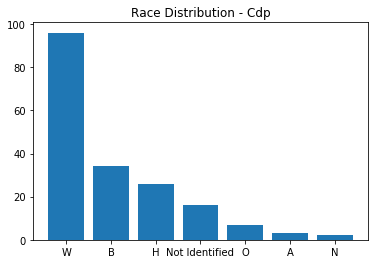

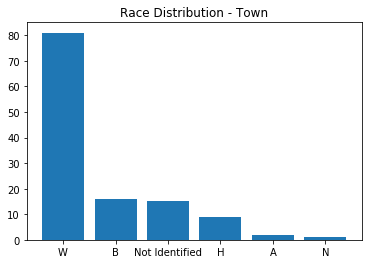

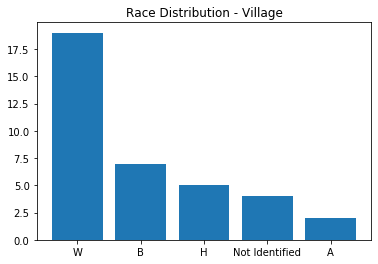

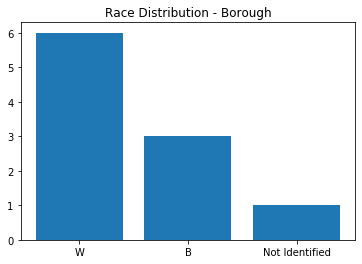

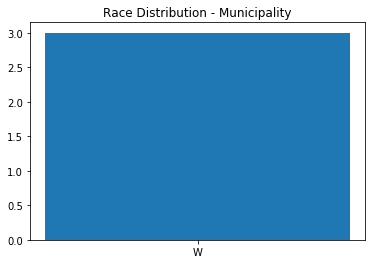

In [9]:
race_distribution(demo_killings_df, 'city_type')

### Mental Illness

- Victims with signs of mental illness are disproportionately white.

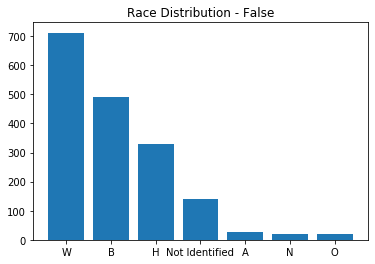

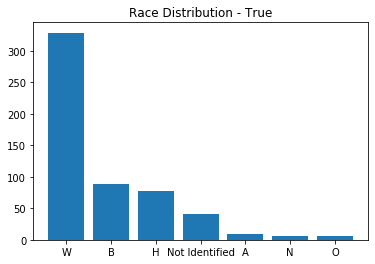

In [10]:
race_distribution(demo_killings_df, 'signs_of_mental_illness')

### Threat Level

- Victims with an "undetermined" threat level are disproportionately POC.

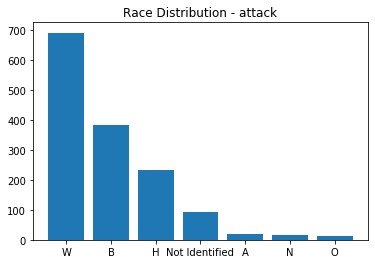

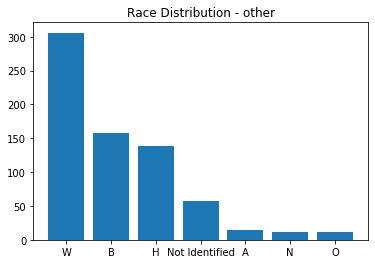

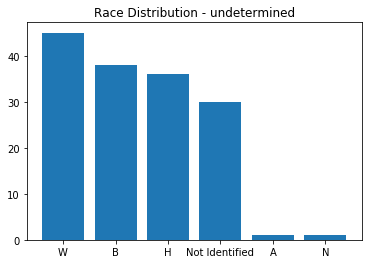

In [11]:
race_distribution(demo_killings_df, 'threat_level')

### Fleeing

- Victims who are fleeing by foot are disproportionately POC.

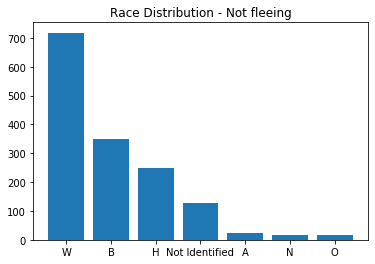

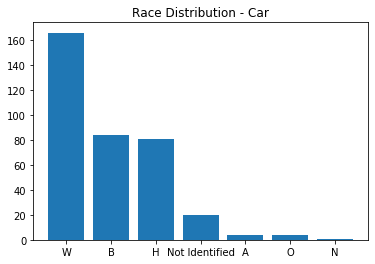

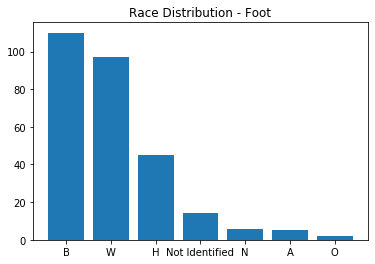

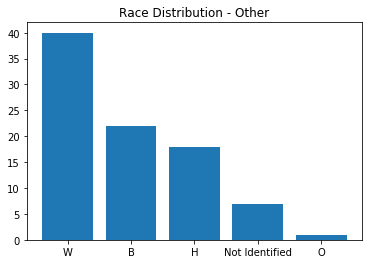

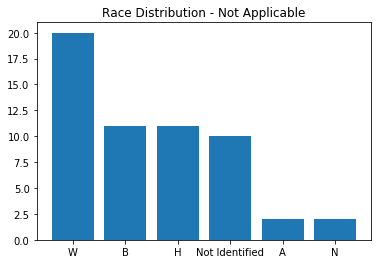

In [12]:
race_distribution(demo_killings_df, 'flee')

### Armed vs Unarmed

- Unarmed victims are disproportionately POC.

In [13]:
demo_killings_df.armed.value_counts()

gun                  1273
sharp object          398
unarmed               182
vehicle               159
undetermined          140
non-lethal object      95
blunt object           45
Name: armed, dtype: int64

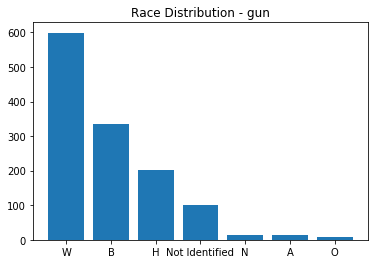

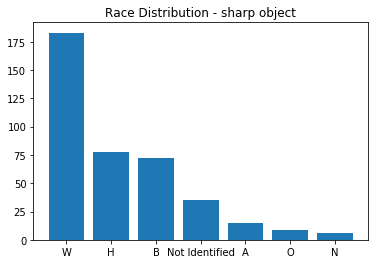

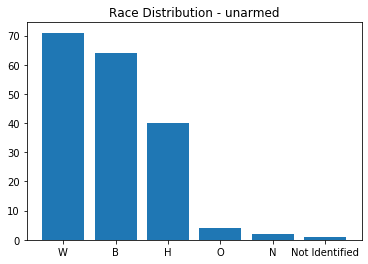

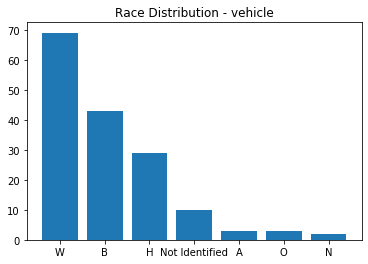

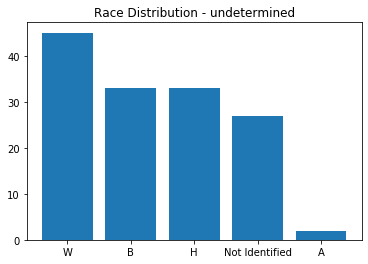

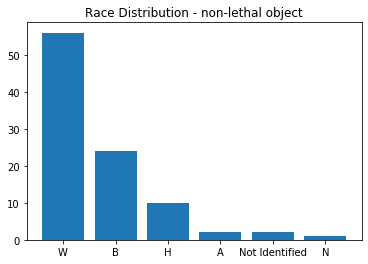

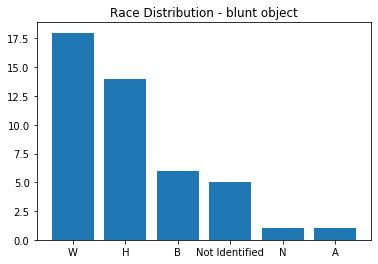

In [14]:
race_distribution(demo_killings_df, 'armed')

### Body Cameras

- No discernable difference

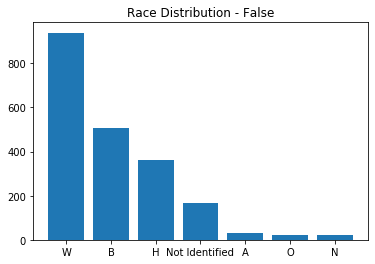

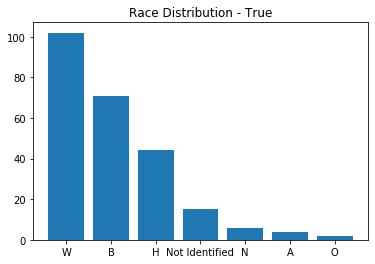

In [15]:
race_distribution(demo_killings_df, 'body_camera')

### Month vs Season

- No discernable differences among seasons

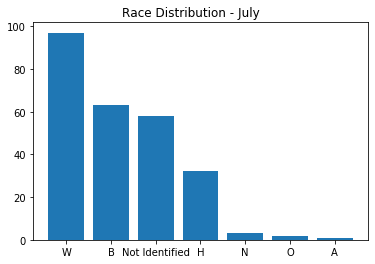

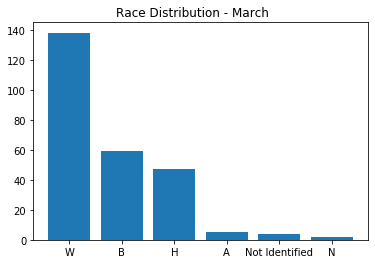

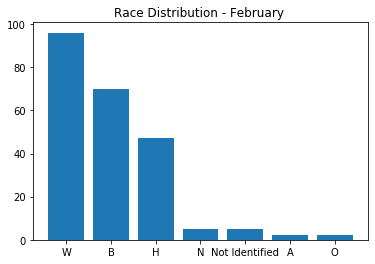

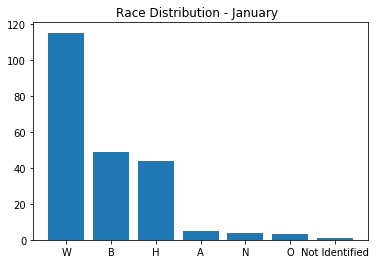

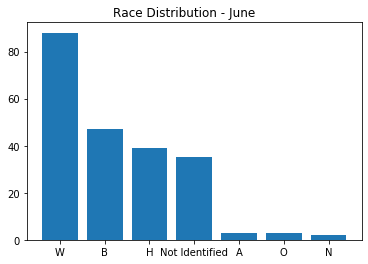

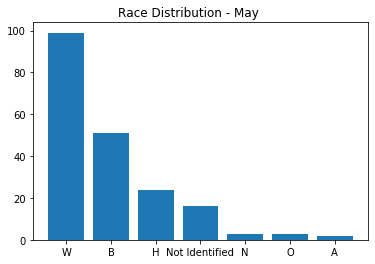

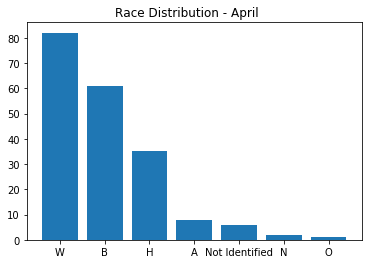

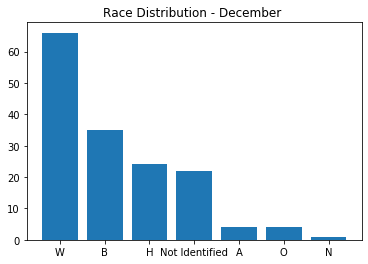

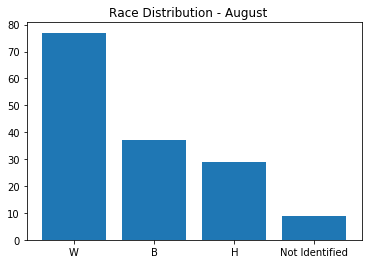

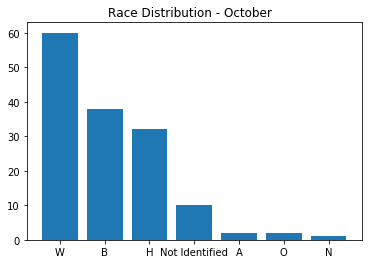

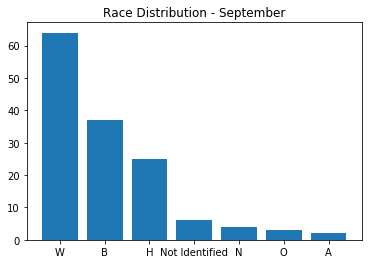

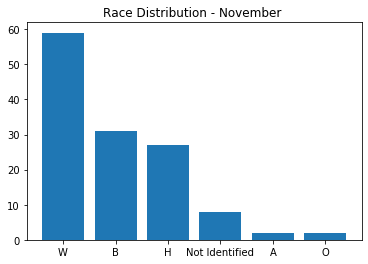

In [16]:
race_distribution(demo_killings_df, 'month')

### Weekday vs Day of Week

- Victims on Thursdays are disproportionately POC.

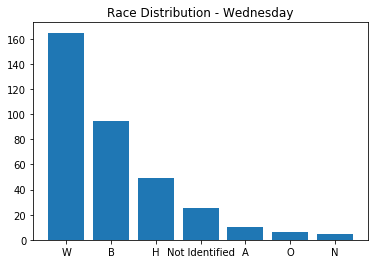

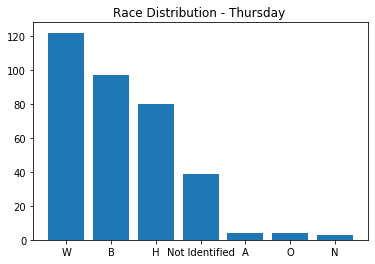

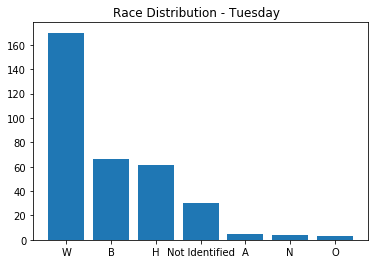

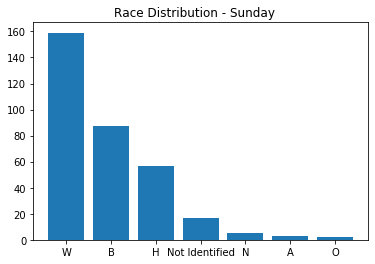

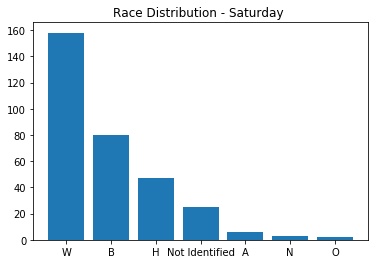

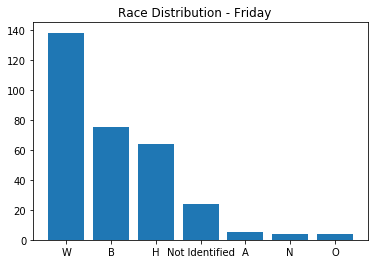

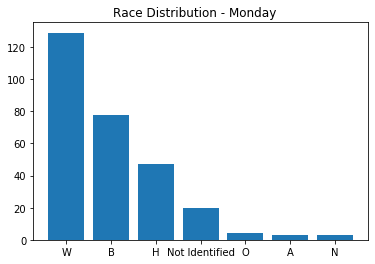

In [17]:
race_distribution(demo_killings_df, 'day_of_week')

---

In [18]:
def eda_charts(df):
    
    plt.bar(df.race.value_counts().index, df.race.value_counts().values)
    plt.title('Police Killings by Race')
    plt.show()
    
    plt.hist(df.poverty_rate)
    plt.title('Poverty Rate Distribution (%)')
    plt.show()
    
    plt.hist(df.percent_completed_hs)
    plt.title('High School Completion (% of Population) Distribution')
    plt.show()
    
    plt.hist(df.median_income)
    plt.title('Median Income Distribution')
    plt.show()

## Top 32 Cities

- POC are disproportionately killed in the cities with the most police shootings.

In [19]:
most_killings_df = demo_killings_df.loc[demo_killings_df['city'].isin(demo_killings_df.city.value_counts().index[:32])]

In [20]:
correlations(most_killings_df)

,year,age,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,median_income
year,1,-0.0225737,0.0524752,0.0270185,-0.0720628,0.067808,0.00180462,-0.00581279,-0.021362,0.02141
age,-0.0225737,1,0.0335589,-0.0172138,-0.0133757,0.0205635,0.0946915,-0.0302982,0.0139335,0.0235178
poverty_rate,0.0524752,0.0335589,1,-0.593567,-0.256303,0.371,0.0202241,-0.383996,0.269718,-0.731257
percent_completed_hs,0.0270185,-0.0172138,-0.593567,1,0.266362,0.0681618,0.168017,-0.0539733,-0.691495,0.351136
share_white,-0.0720628,-0.0133757,-0.256303,0.266362,1,-0.614947,0.328022,-0.415478,0.188204,-0.187105
share_black,0.067808,0.0205635,0.371,0.0681618,-0.614947,1,-0.372947,-0.270528,-0.509775,-0.251733
share_native_american,0.00180462,0.0946915,0.0202241,0.168017,0.328022,-0.372947,1,-0.207935,0.0270493,-0.16451
share_asian,-0.00581279,-0.0302982,-0.383996,-0.0539733,-0.415478,-0.270528,-0.207935,1,0.0110131,0.720365
share_hispanic,-0.021362,0.0139335,0.269718,-0.691495,0.188204,-0.509775,0.0270493,0.0110131,1,-0.126364
median_income,0.02141,0.0235178,-0.731257,0.351136,-0.187105,-0.251733,-0.16451,0.720365,-0.126364,1


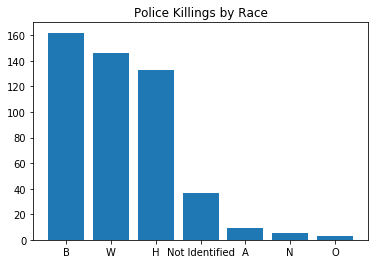

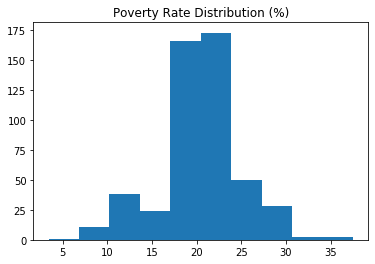

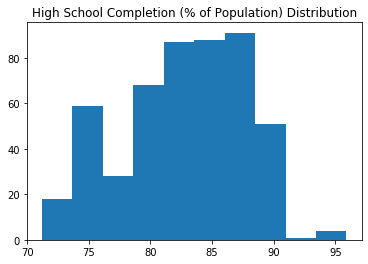

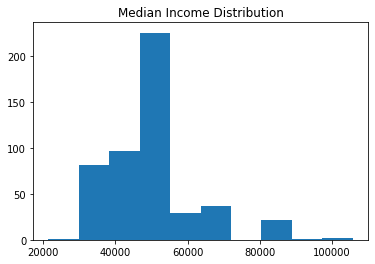

In [21]:
eda_charts(most_killings_df)

## Rest of Cities

In [22]:
rest_killings_df = demo_killings_df.loc[demo_killings_df['city'].isin(demo_killings_df.city.value_counts().index[32:])]

In [23]:
correlations(rest_killings_df)

,year,age,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,median_income
year,1,0.0110032,-0.00936527,0.0376429,-0.0103968,-0.0121096,0.0769672,0.00253762,-0.0650818,0.012018
age,0.0110032,1,-0.0426103,0.0449708,0.182563,-0.112035,-0.0204829,-0.0664551,-0.110606,-0.0080744
poverty_rate,-0.00936527,-0.0426103,1,-0.501301,-0.347866,0.372602,0.135072,-0.21566,0.110625,-0.754969
percent_completed_hs,0.0376429,0.0449708,-0.501301,1,0.318159,-0.106301,-0.0454639,0.0738655,-0.623868,0.415285
share_white,-0.0103968,0.182563,-0.347866,0.318159,1,-0.744078,-0.159267,-0.341158,-0.224239,0.103993
share_black,-0.0121096,-0.112035,0.372602,-0.106301,-0.744078,1,-0.114714,-0.106324,-0.197328,-0.277315
share_native_american,0.0769672,-0.0204829,0.135072,-0.0454639,-0.159267,-0.114714,1,-0.0573596,-0.0340832,-0.0721554
share_asian,0.00253762,-0.0664551,-0.21566,0.0738655,-0.341158,-0.106324,-0.0573596,1,0.123484,0.445835
share_hispanic,-0.0650818,-0.110606,0.110625,-0.623868,-0.224239,-0.197328,-0.0340832,0.123484,1,0.0169722
median_income,0.012018,-0.0080744,-0.754969,0.415285,0.103993,-0.277315,-0.0721554,0.445835,0.0169722,1


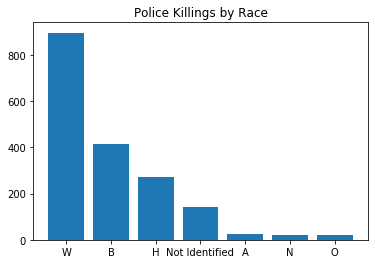

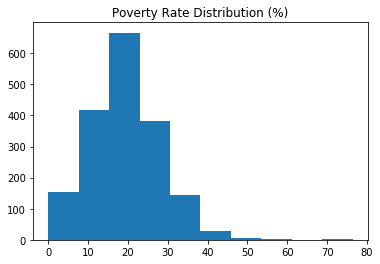

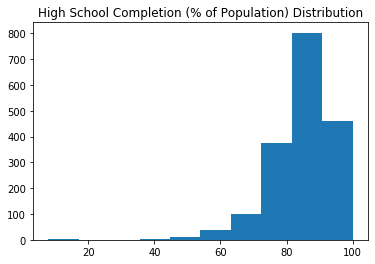

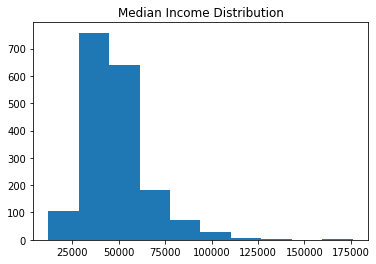

In [24]:
eda_charts(rest_killings_df)